In [0]:
from __future__ import print_function
import keras
from keras.preprocessing.image import ImageDataGenerator
from keras.models import Sequential
from keras.layers import Dense, Dropout, Activation, Flatten, Conv2D, MaxPooling2D
import os
import matplotlib.pyplot as plt
import sklearn
from sklearn.metrics import classification_report, confusion_matrix
import numpy as np
from keras.models import load_model

from keras.optimizers import RMSprop, SGD
from keras.callbacks import ModelCheckpoint, EarlyStopping, ReduceLROnPlateau

from keras.preprocessing import image
from os import listdir
from os.path import isfile, join
import re
import matplotlib.image as mpimg

Using TensorFlow backend.


In [0]:
num_classes = 114
img_rows, img_cols = 100, 100
batch_size = 32

train_data_dir = '/content/fruits-360/Training'
validation_data_dir = '/content/fruits-360/Test'

#data augmentaiton 
train_datagen = ImageDataGenerator(rescale=1./255, rotation_range=30, width_shift_range=0.3, height_shift_range=0.3,
                                   horizontal_flip=True, fill_mode='nearest')
 
test_datagen = ImageDataGenerator(rescale=1./255)
 
train_generator = train_datagen.flow_from_directory(train_data_dir, target_size=(img_rows, img_cols), batch_size=batch_size,
                                                    class_mode='categorical', shuffle=True)
 
test_generator = test_datagen.flow_from_directory(validation_data_dir, target_size=(img_rows, img_cols),
                                                              batch_size=batch_size, class_mode='categorical', shuffle=False)





Found 57276 images belonging to 114 classes.
Found 19548 images belonging to 114 classes.


In [0]:
from google.colab import drive
drive.mount('/content/drive')
!unzip -q "/content/drive/My Drive/Colab Notebooks/fruits-360_dataset.zip"

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3Aietf%3Awg%3Aoauth%3A2.0%3Aoob&scope=email%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdocs.test%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive.photos.readonly%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fpeopleapi.readonly&response_type=code

Enter your authorization code:
··········
Mounted at /content/drive


In [0]:
from keras.layers import Conv2D, MaxPooling2D, GlobalAveragePooling2D
from keras.layers import Dropout, Flatten, Dense, BatchNormalization, LeakyReLU
from keras.models import Sequential

model = Sequential()

# glorot_normal means xavier normal initializer
model.add(Conv2D(input_shape=(100, 100, 3), kernel_size=(7,7), filters=16, padding='same', use_bias=False, activation=None, kernel_initializer='glorot_normal'))
model.add(BatchNormalization(axis=3))
model.add(LeakyReLU(alpha=0.1))
model.add(Conv2D(kernel_size=(5,5), filters=32, padding='valid', use_bias=False, activation=None, kernel_initializer='glorot_normal'))
model.add(BatchNormalization(axis=3))
model.add(LeakyReLU(alpha=0.1))
model.add(MaxPooling2D(strides=2, padding='valid'))

model.add(Conv2D(kernel_size=(7,7), filters=32, padding='same', use_bias=False, activation=None, kernel_initializer='glorot_normal'))
model.add(BatchNormalization(axis=3))
model.add(LeakyReLU(alpha=0.1))
model.add(Conv2D(kernel_size=(5,5), filters=64, padding='valid', use_bias=False, activation=None, kernel_initializer='glorot_normal'))
model.add(BatchNormalization(axis=3))
model.add(LeakyReLU(alpha=0.1))
model.add(MaxPooling2D(strides=2, padding='valid'))

model.add(Conv2D(kernel_size=(5,5), filters=128, padding='valid', use_bias=False, activation=None, kernel_initializer='glorot_normal'))
model.add(BatchNormalization(axis=3))
model.add(LeakyReLU(alpha=0.1))
model.add(Conv2D(kernel_size=(3,3), filters=256, padding='valid', use_bias=False, activation=None, kernel_initializer='glorot_normal'))
model.add(BatchNormalization(axis=3))
model.add(LeakyReLU(alpha=0.1))
model.add(MaxPooling2D(strides=2, padding='valid'))

model.add(Conv2D(kernel_size=(3,3), filters=256, padding='valid', use_bias=False, activation=None, kernel_initializer='glorot_normal'))
model.add(BatchNormalization(axis=3))
model.add(LeakyReLU(alpha=0.1))
model.add(Conv2D(kernel_size=(3,3), filters=512, padding='valid', use_bias=False, activation=None, kernel_initializer='glorot_normal'))
model.add(BatchNormalization(axis=3))
model.add(LeakyReLU(alpha=0.1))
model.add(GlobalAveragePooling2D())


#model.add(Dropout(0.2))
model.add(Dense(256, use_bias=False, activation=None, kernel_initializer='glorot_normal'))
model.add(BatchNormalization(axis=1))
model.add(LeakyReLU(alpha=0.1))
model.add(Dropout(0.2))

model.add(Dense(114, activation='softmax'))

model.summary()

W0721 08:42:05.378886 140471428446080 deprecation_wrapper.py:119] From /usr/local/lib/python3.6/dist-packages/keras/backend/tensorflow_backend.py:74: The name tf.get_default_graph is deprecated. Please use tf.compat.v1.get_default_graph instead.

W0721 08:42:05.419440 140471428446080 deprecation_wrapper.py:119] From /usr/local/lib/python3.6/dist-packages/keras/backend/tensorflow_backend.py:517: The name tf.placeholder is deprecated. Please use tf.compat.v1.placeholder instead.

W0721 08:42:05.426829 140471428446080 deprecation_wrapper.py:119] From /usr/local/lib/python3.6/dist-packages/keras/backend/tensorflow_backend.py:4185: The name tf.truncated_normal is deprecated. Please use tf.random.truncated_normal instead.

W0721 08:42:05.472005 140471428446080 deprecation_wrapper.py:119] From /usr/local/lib/python3.6/dist-packages/keras/backend/tensorflow_backend.py:174: The name tf.get_default_session is deprecated. Please use tf.compat.v1.get_default_session instead.

W0721 08:42:05.473483

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 100, 100, 16)      2352      
_________________________________________________________________
batch_normalization_1 (Batch (None, 100, 100, 16)      64        
_________________________________________________________________
leaky_re_lu_1 (LeakyReLU)    (None, 100, 100, 16)      0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 96, 96, 32)        12800     
_________________________________________________________________
batch_normalization_2 (Batch (None, 96, 96, 32)        128       
_________________________________________________________________
leaky_re_lu_2 (LeakyReLU)    (None, 96, 96, 32)        0         
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 48, 48, 32)        0         
__________

In [0]:
checkpoint = ModelCheckpoint("/content/fruits-360/fruits_1.h5", monitor="val_loss", mode="min", save_best_only = True, verbose=1)

earlystop = EarlyStopping(monitor = 'val_loss', min_delta = 0, patience = 3, verbose = 1, restore_best_weights = True)

reduce_lr = ReduceLROnPlateau(monitor = 'val_loss', factor = 0.2, patience = 3, verbose = 1, min_delta = 0.0001)

callbacks = [earlystop, checkpoint, reduce_lr]

model.compile(loss = 'categorical_crossentropy', optimizer = RMSprop(lr = 0.001), metrics = ['accuracy'])

nb_train_samples = 57276 
nb_validation_samples = 19548 
epochs = 5


In [0]:

history = model.fit_generator(train_generator, steps_per_epoch = nb_train_samples // batch_size, epochs = epochs, 
                              callbacks = callbacks, validation_data = test_generator, 
                              validation_steps = nb_validation_samples // batch_size)

W0721 08:42:56.519699 140471428446080 deprecation.py:323] From /usr/local/lib/python3.6/dist-packages/tensorflow/python/ops/math_grad.py:1250: add_dispatch_support.<locals>.wrapper (from tensorflow.python.ops.array_ops) is deprecated and will be removed in a future version.
Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where


Epoch 1/5
1789/1789 [==============================] - 272s 152ms/step - loss: 2.1283 - acc: 0.3726 - val_loss: 1.0719 - val_acc: 0.6178

Epoch 00001: val_loss improved from inf to 1.07189, saving model to /content/fruits-360/fruits_1.h5
Epoch 2/5
1789/1789 [==============================] - 266s 149ms/step - loss: 1.1747 - acc: 0.6207 - val_loss: 0.6268 - val_acc: 0.7837

Epoch 00002: val_loss improved from 1.07189 to 0.62678, saving model to /content/fruits-360/fruits_1.h5
Epoch 3/5
1789/1789 [==============================] - 266s 149ms/step - loss: 0.8013 - acc: 0.7395 - val_loss: 0.3605 - val_acc: 0.8663

Epoch 00003: val_loss improved from 0.62678 to 0.36049, saving model to /content/fruits-360/fruits_1.h5
Epoch 4/5
1789/1789 [==============================] - 267s 149ms/step - loss: 0.5983 - acc: 0.8060 - val_loss: 0.4005 - val_acc: 0.8795

Epoch 00004: val_loss did not improve from 0.36049
Epoch 5/5
1789/1789 [==============================] - 267s 149ms/step - loss: 0.4642 - a

In [0]:
def getRandomImage(path, img_width, img_height):
    """function loads a random images from a random folder in our test path """
    folders = list(filter(lambda x: os.path.isdir(os.path.join(path, x)), os.listdir(path)))
    random_directory = np.random.randint(0,len(folders))
    path_class = folders[random_directory]
    file_path = path + path_class
    file_names = [f for f in listdir(file_path) if isfile(join(file_path, f))]
    random_file_index = np.random.randint(0,len(file_names))
    image_name = file_names[random_file_index]
    final_path = file_path + "/" + image_name
    return image.load_img(final_path, target_size = (img_width, img_height)), final_path, path_class

# dimensions of our images
img_width, img_height = 100, 100

files = []
predictions = []
true_labels = []

# predicting images
for i in range(0, 15):
    path = '/content/fruits-360/Test/' 
    img, final_path, true_label = getRandomImage(path, img_width, img_height)
    files.append(final_path)
    true_labels.append(true_label)
    x = image.img_to_array(img)
    x = x * 1./255
    x = np.expand_dims(x, axis=0)
    images = np.vstack([x])
    classes = model.predict_classes(images, batch_size = 10)
    predictions.append(classes)


In [0]:
from tqdm import tqdm
count =0
for i in tqdm(range(0, len(files))):
    img=mpimg.imread((files[i]))
    a = [predictions[i][0]]
    if (class_labels[predictions[i][0]] == true_labels[i]):
      count += 1;
print(acc)
acc = count/19548;
print("accuracy {}".format(acc*100))
    

  0%|          | 0/15 [00:00<?, ?it/s]


NameError: ignored


( 1 )


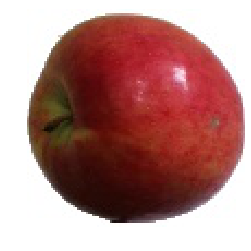

Predicted:  Apple Crimson Snow
True:  Apple Crimson Snow

( 2 )


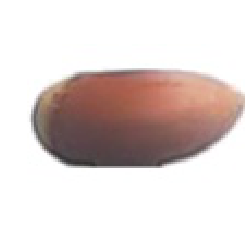

Predicted:  Hazelnut
True:  Hazelnut

( 3 )


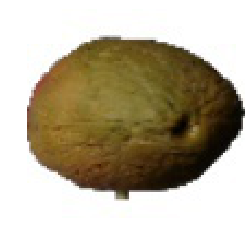

Predicted:  Papaya
True:  Papaya

( 4 )


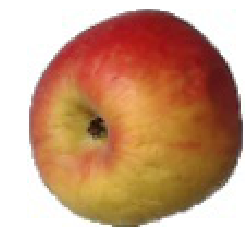

Predicted:  Apple Red Yellow 1
True:  Apple Red Yellow 1

( 5 )


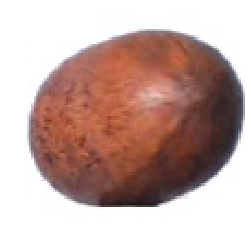

Predicted:  Nut Pecan
True:  Nut Pecan

( 6 )


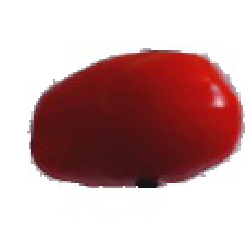

Predicted:  Tomato 3
True:  Tomato 2

( 7 )


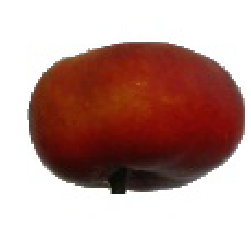

Predicted:  Nectarine Flat
True:  Nectarine Flat

( 8 )


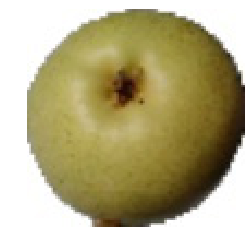

Predicted:  Pear
True:  Pear

( 9 )


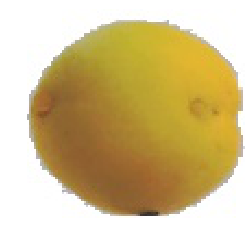

Predicted:  Peach 2
True:  Peach 2

( 10 )


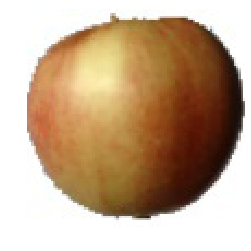

Predicted:  Apple Red 2
True:  Apple Red 2

( 11 )


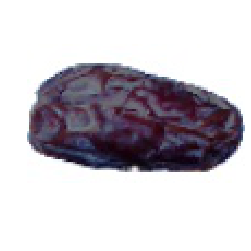

Predicted:  Dates
True:  Dates

( 12 )


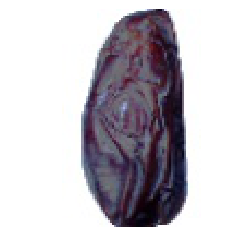

Predicted:  Dates
True:  Dates

( 13 )


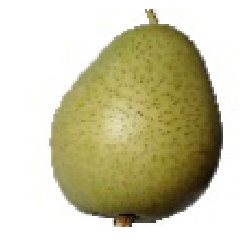

Predicted:  Pear
True:  Pear

( 14 )


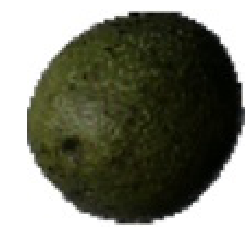

Predicted:  Avocado
True:  Avocado

( 15 )


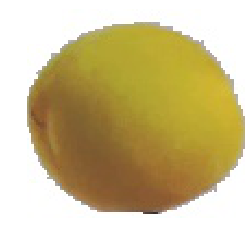

Predicted:  Peach 2
True:  Peach 2


In [0]:
    
for i in range(0, 15):
  img=mpimg.imread((files[i]))
  print("\n(",i+1,")")
  plt.imshow(img)
  plt.axis('off')
  plt.show()
  print("Predicted: ", class_labels[predictions[i][0]])
  print("True: ", true_labels[i])